In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("/content/airline_passenger_satisfaction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
data.shape

(129880, 24)

In [5]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [8]:
data.duplicated().sum()

0

In [9]:
data.dropna(inplace = True)

In [10]:
data.shape

(129487, 24)

In [11]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


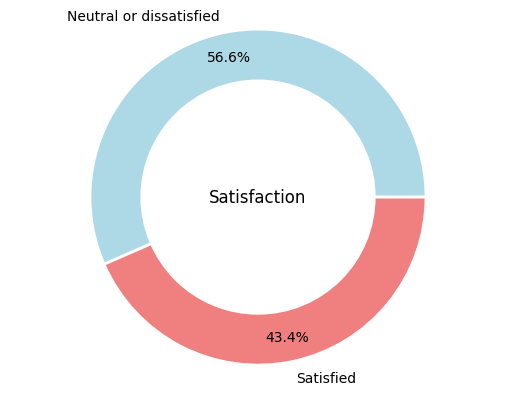

In [ ]:
plt.pie(data['Satisfaction'].value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], colors=["lightblue", "lightcoral"], autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)

# Adding a circle in the center to make it look like a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.text(0, 0, "Satisfaction", fontsize=12, color='black', ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

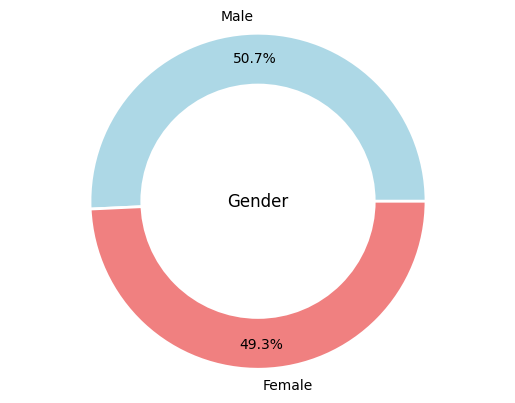

In [ ]:
plt.pie(data['Gender'].value_counts(), labels=["Male", "Female"], colors=["lightblue", "lightcoral"], autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)

# Adding a circle in the center to make it look like a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.text(0, 0, "Gender", fontsize=12, color='black', ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

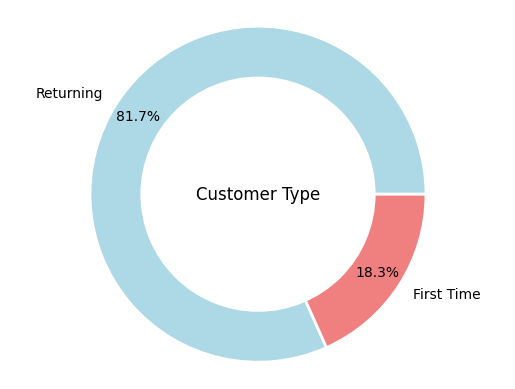

In [ ]:
plt.pie(data['Customer Type'].value_counts(), labels=["Returning", "First Time"], colors=["lightblue", "lightcoral"], autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)

# Adding a circle in the center to make it look like a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.text(0, 0, "Customer Type", fontsize=12, color='black', ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

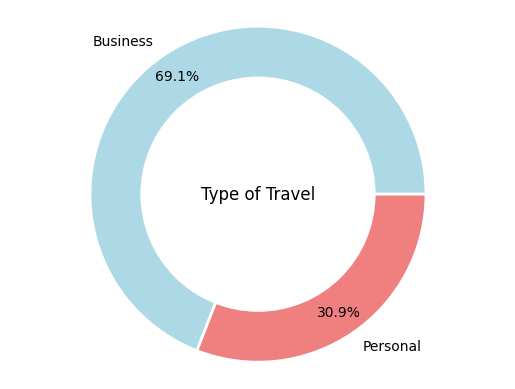

In [ ]:
plt.pie(data['Type of Travel'].value_counts(), labels=['Business', 'Personal'], colors=["lightblue", "lightcoral"], autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)

# Adding a circle in the center to make it look like a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.text(0, 0, "Type of Travel", fontsize=12, color='black', ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

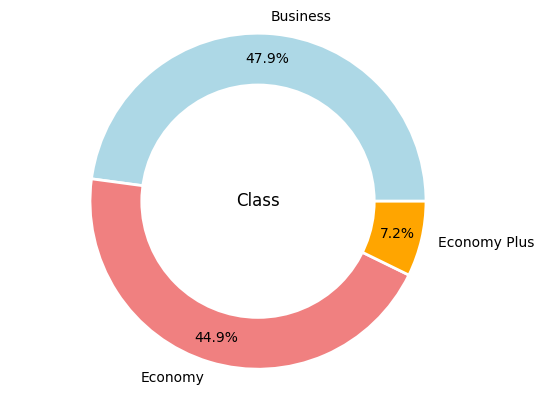

In [ ]:
plt.pie(data['Class'].value_counts(), labels=['Business', 'Economy', 'Economy Plus'], colors=["lightblue", "lightcoral","orange"], autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)

# Adding a circle in the center to make it look like a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.text(0, 0, "Class", fontsize=12, color='black', ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

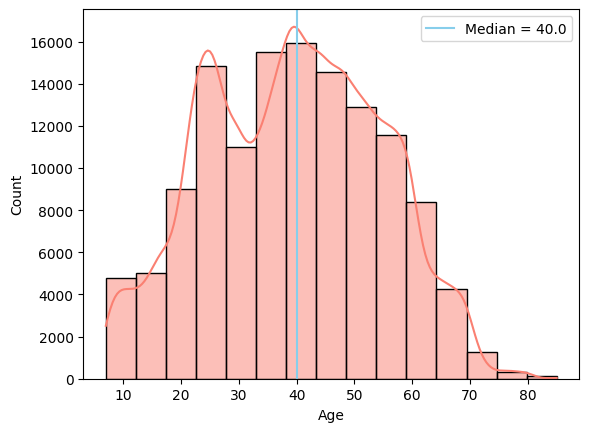

In [ ]:
hist_color = "salmon"

# Custom color for the median line
median_line_color = "skyblue"

# Use sns.histplot with the custom colors
sns.histplot(x="Age", data=data, kde=True, bins=15, color=hist_color)

# Add a vertical line for the median with the custom color
plt.axvline(data.Age.median(), label=f'Median = {data.Age.median()}', color=median_line_color)

plt.legend()
plt.show()

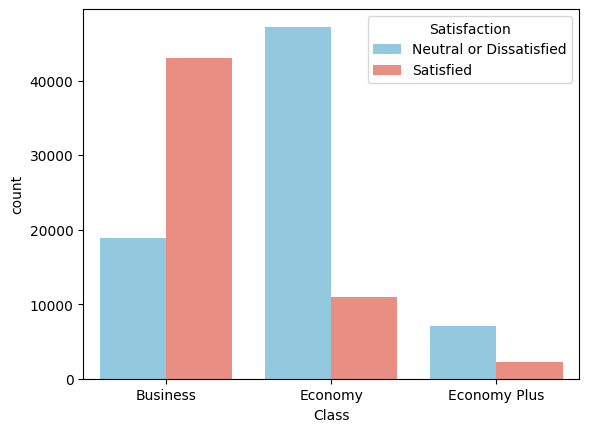

In [ ]:
custom_palette = ["skyblue", "salmon"]
sns.countplot(x='Class', hue='Satisfaction', palette=custom_palette, data=data)
plt.show()

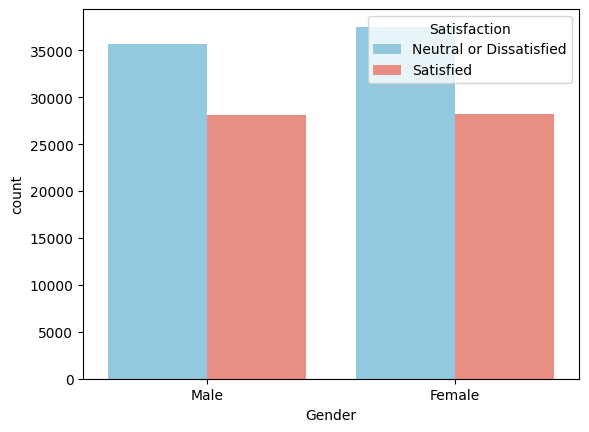

In [ ]:
sns.countplot(x='Gender', hue='Satisfaction', palette=custom_palette, data=data)
plt.show()

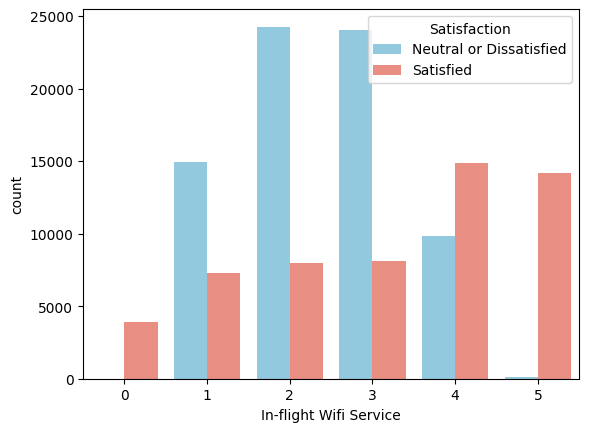

In [ ]:
sns.countplot(x='In-flight Wifi Service', hue='Satisfaction', palette=custom_palette, data=data)
plt.show()

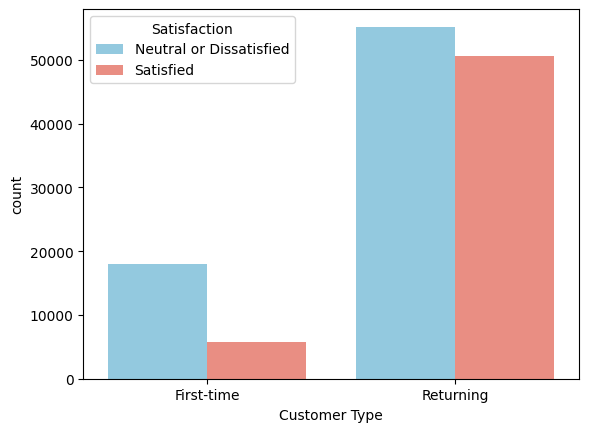

In [ ]:
sns.countplot(x='Customer Type', hue='Satisfaction', palette=custom_palette, data=data)
plt.show()

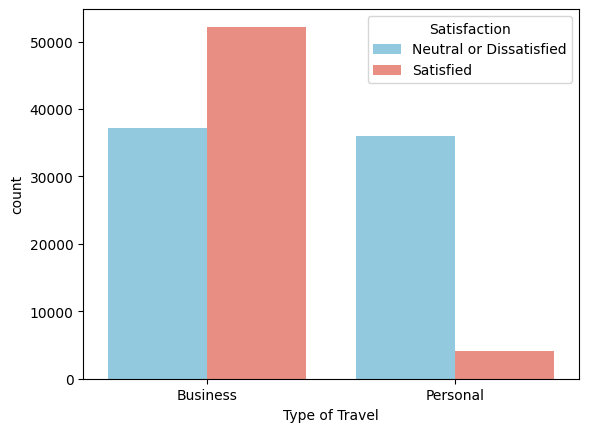

In [ ]:
sns.countplot(x='Type of Travel', hue='Satisfaction', palette=custom_palette, data=data)
plt.show()

In [ ]:
data.columns.get_loc("Departure and Arrival Time Convenience")

9

In [ ]:
data.columns.get_loc("Satisfaction")

23

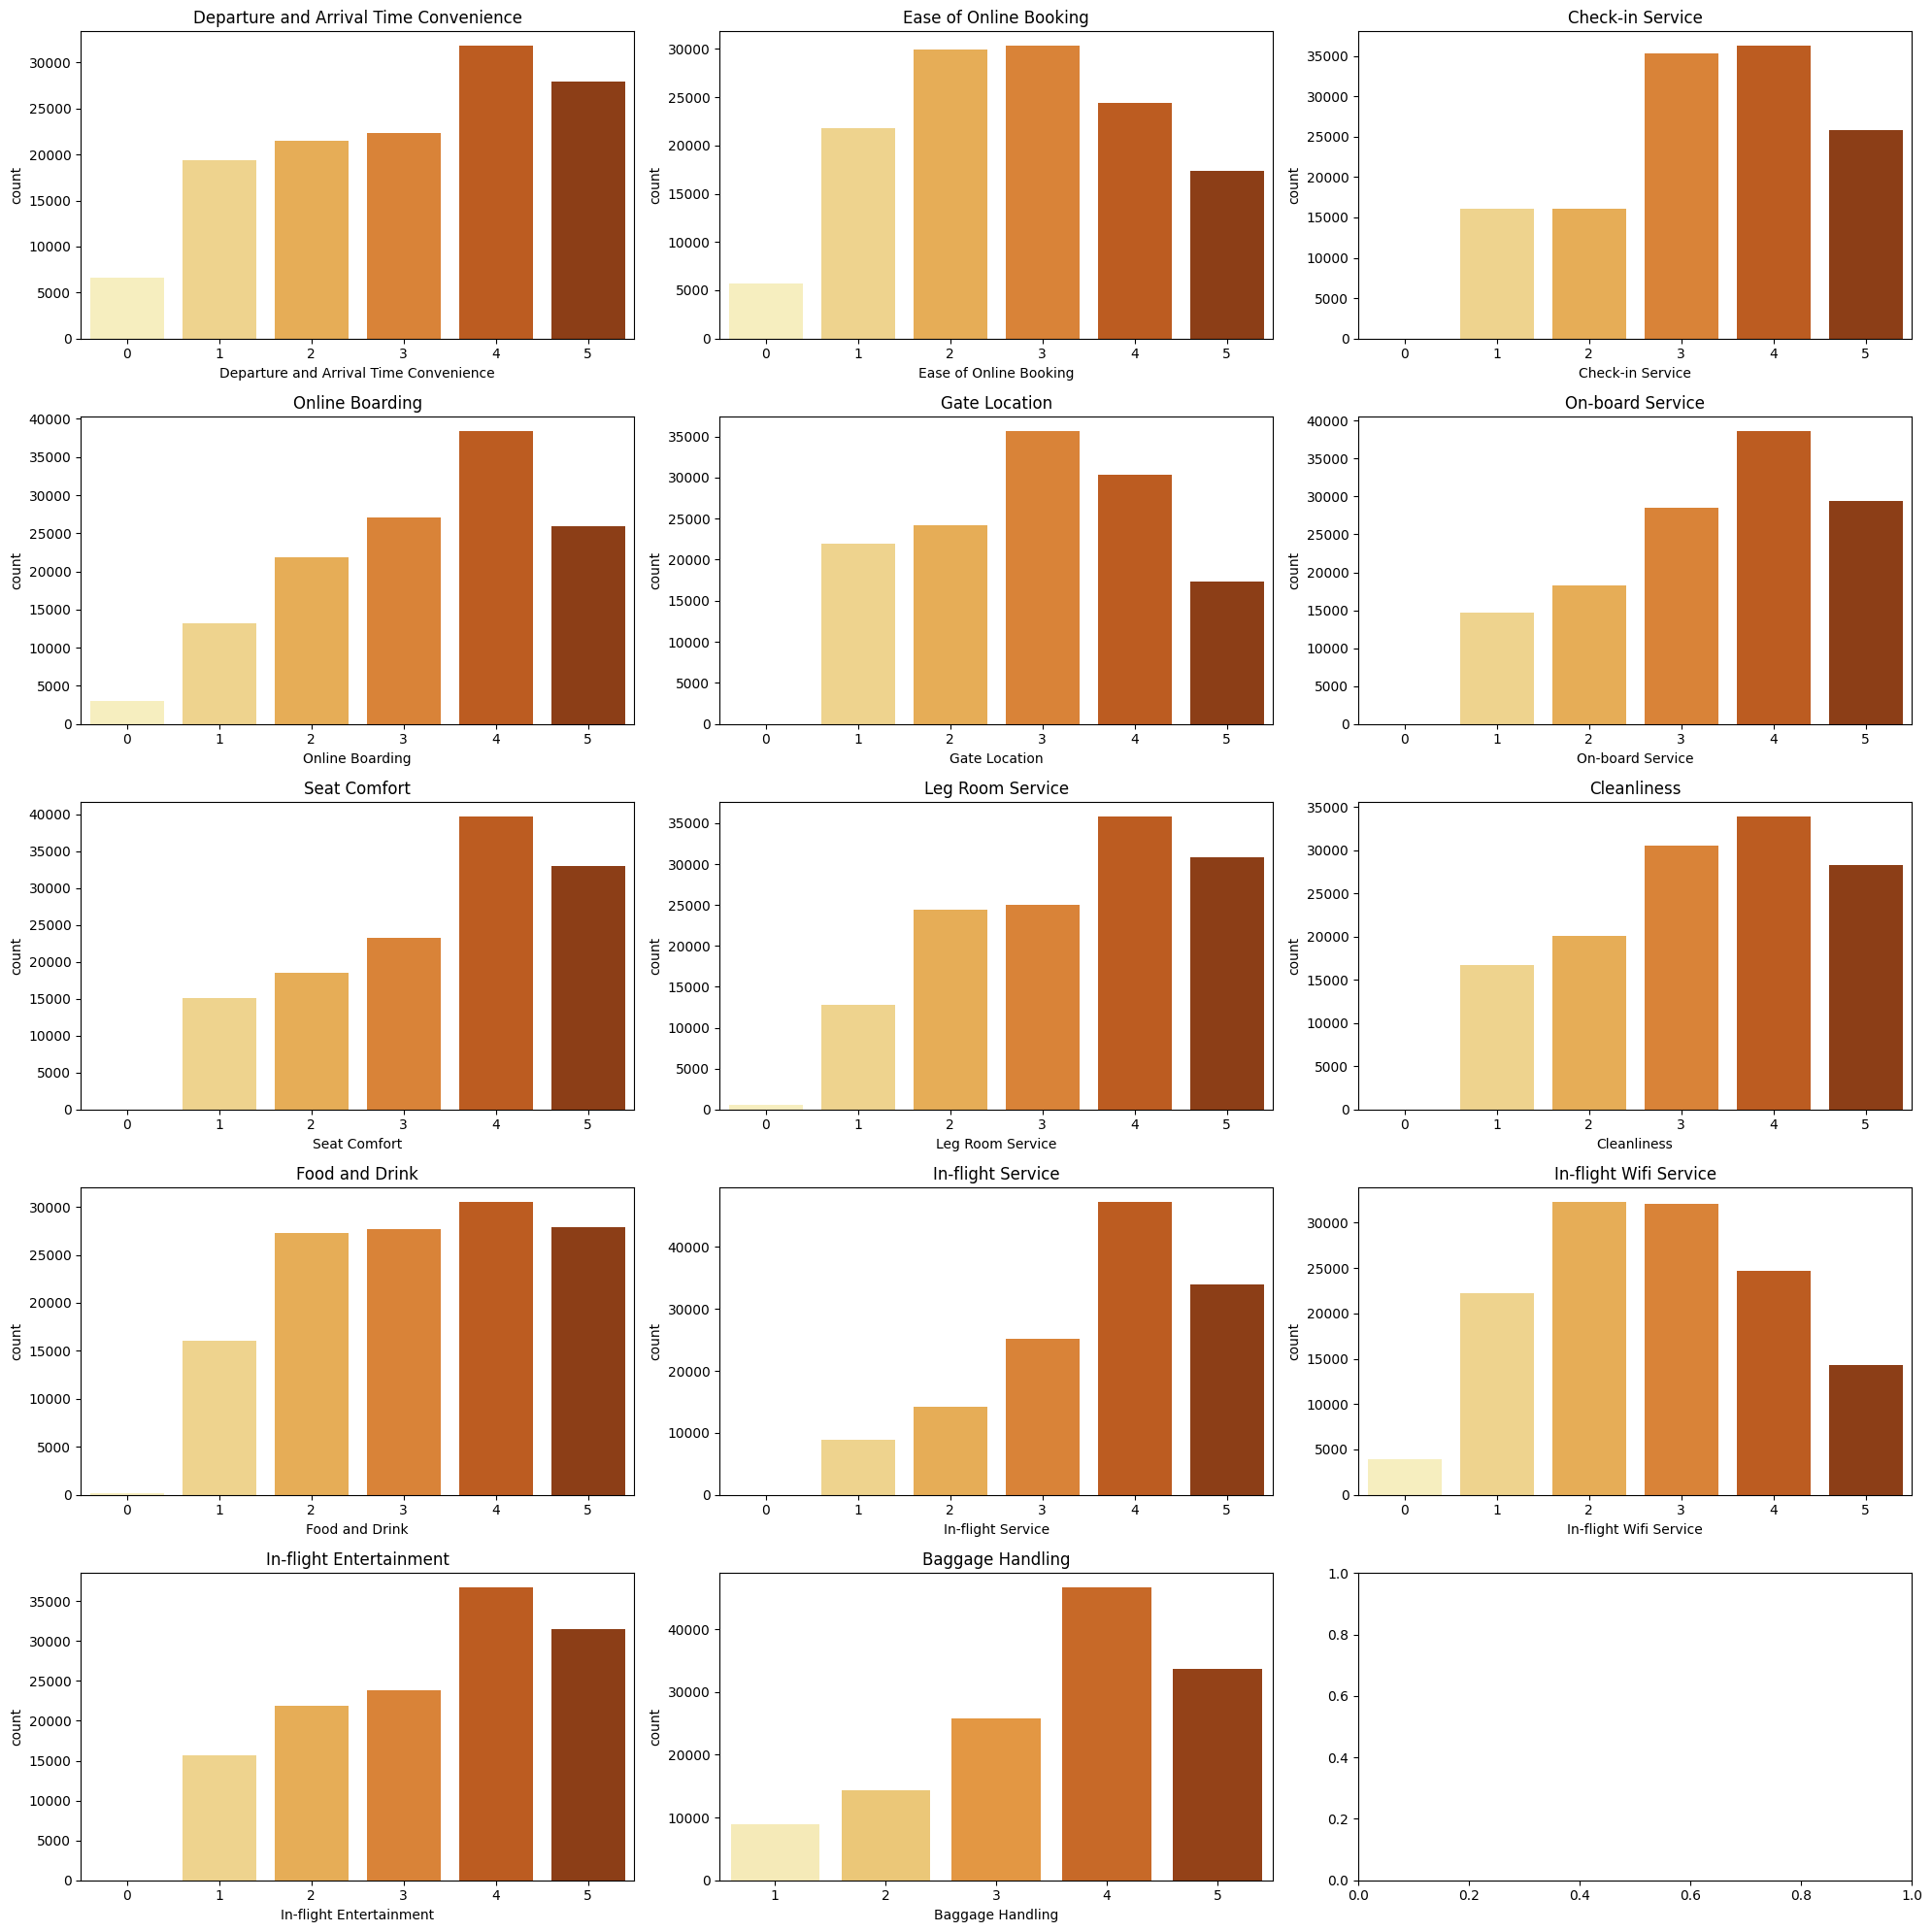

In [ ]:
categorical_indexes = [9,10,11,12,13,14,15,16,17,18,19,20,21,22]  # Update with your categorical column indexes
categ = data.iloc[:, categorical_indexes]

num_cols = len(categ.columns)
num_rows = (num_cols - 1) // 3 + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 20))

for i, col in enumerate(categ):
    sns.countplot(x=col, data=data, palette="YlOrBr", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            data[i]=label_encoder.fit_transform(data[i])

In [13]:
data.drop(['ID'], axis=1,inplace= True)

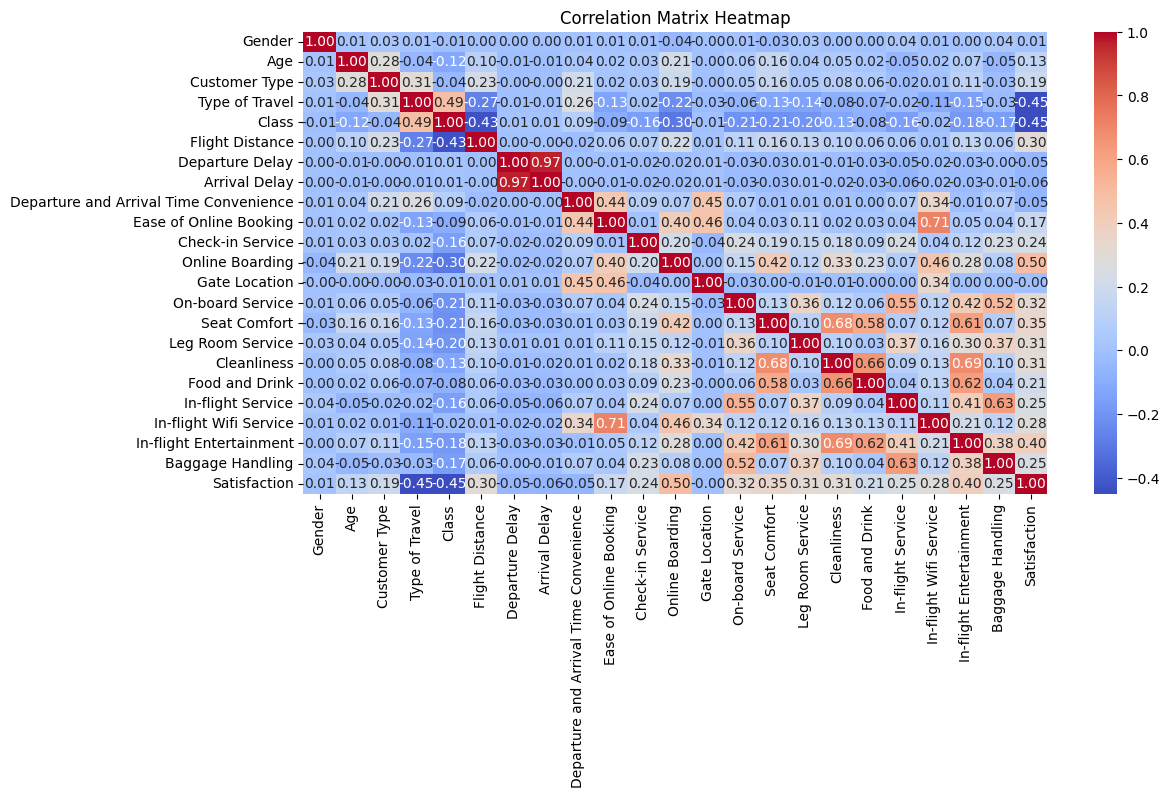

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
X = data.drop('Satisfaction', axis = 1)
y = data['Satisfaction'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}
scoring_metrics = ['f1', 'accuracy', 'precision', 'recall']
# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(rf_model, param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



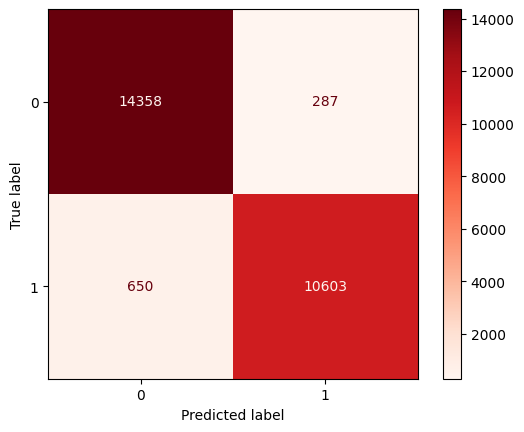

In [27]:
# Make predictions on the test set
rf_y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Reds')
plt.grid(False)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_fscore = f1_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)


In [ ]:
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 21))

# Initialize an empty list to store the cross-validation scores for each k
cv_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the k that gives the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

Best k: 9


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [21]:
knn_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
knn_y_pred = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14645
           1       0.95      0.88      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



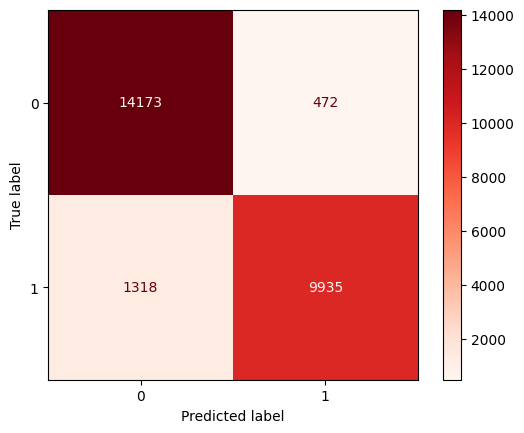

In [34]:
print(classification_report(y_test ,knn_y_pred ))
ConfusionMatrixDisplay.from_predictions(y_test,knn_y_pred , cmap='Reds')
plt.grid(False)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_fscore = f1_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
scoring_metrics = ['f1', 'accuracy', 'precision', 'recall']

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Create GridSearchCV instance
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Get the best model
best_model_dt = grid_search_dt.best_estimator_


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14645
           1       0.96      0.93      0.95     11253

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



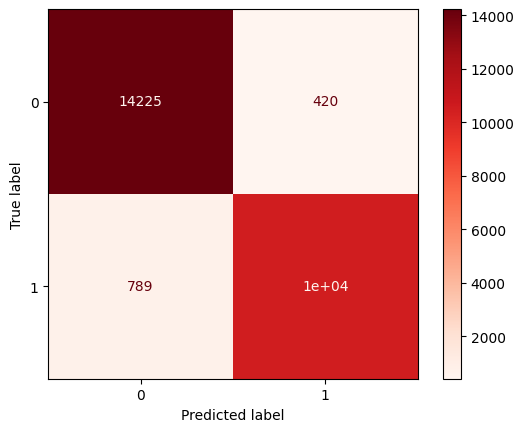

In [25]:
# Make predictions on the test set using the best Decision Tree model
dt_y_pred = best_model_dt.predict(X_test)

# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_y_pred))

# Display confusion matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay.from_estimator(best_model_dt, X_test, y_test, cmap='Reds')
plt.grid(False)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_fscore = f1_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)

In [26]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 2]
}

scoring_metrics = ['f1', 'accuracy', 'precision', 'recall']

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Create GridSearchCV instance
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.98      0.94      0.96     11253

    accuracy                           0.97     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.97      0.97     25898



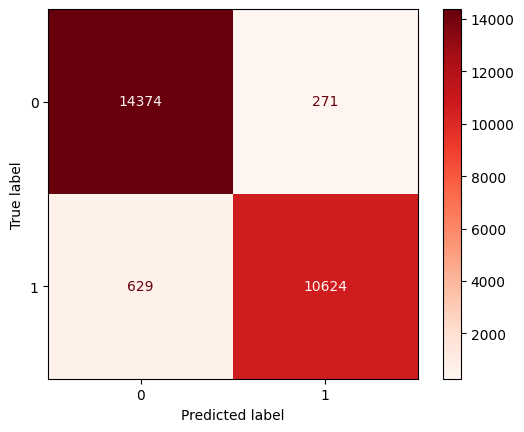

In [31]:
# Make predictions on the test set using the best XGBoost model
xgb_y_pred = best_model_xgb.predict(X_test)

# Print classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_y_pred))

# Display confusion matrix for XGBoost
disp_xgb = ConfusionMatrixDisplay.from_estimator(best_model_xgb, X_test, y_test, cmap='Reds')
plt.grid(False)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_fscore = f1_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)

In [28]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
scoring_metrics = ['f1', 'accuracy', 'precision', 'recall']

# Create a Logistic Regression classifier
lr_model = LogisticRegression()

# Create GridSearchCV instance
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14645
           1       0.87      0.84      0.85     11253

    accuracy                           0.88     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.88      0.87     25898



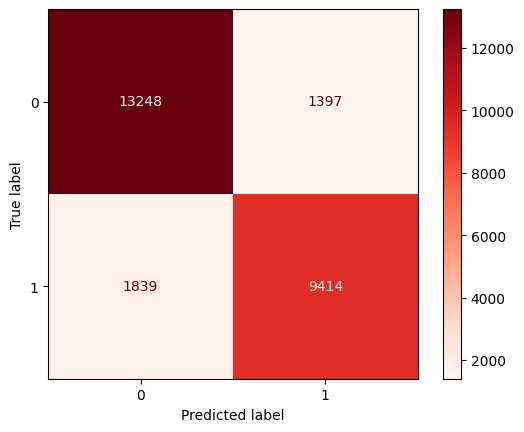

In [44]:
# Get the best model
best_model_lr = grid_search_lr.best_estimator_
# Make predictions on the test set using the best Logistic Regression model
lr_y_pred = best_model_lr.predict(X_test)

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_y_pred))

# Display confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay.from_estimator(best_model_lr, X_test, y_test, cmap='Reds')
plt.grid(False)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_fscore = f1_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

scoring_metrics = ['f1', 'accuracy', 'precision', 'recall']

# Create an AdaBoost classifier
ada_model = AdaBoostClassifier()

# Create GridSearchCV instance
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search_ada.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ada = grid_search_ada.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_ada)

# Get the best model
best_model_ada = grid_search_ada.best_estimator_

Best Hyperparameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 200}


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14645
           1       0.92      0.91      0.91     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.92     25898
weighted avg       0.93      0.93      0.93     25898



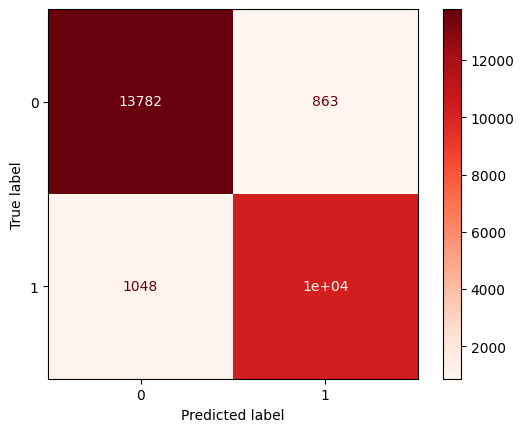

In [ ]:
 #Make predictions on the test set using the best AdaBoost model
ada_y_pred = best_model_ada.predict(X_test)

# Print classification report
print("Classification Report for AdaBoost:")
print(classification_report(y_test, ada_y_pred))

# Display confusion matrix for AdaBoost
disp_ada = ConfusionMatrixDisplay.from_estimator(best_model_ada, X_test, y_test, cmap='Reds')
plt.grid(False)
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_fscore = f1_score(y_test, ada_y_pred)
ada_precision = precision_score(y_test, ada_y_pred)
ada_recall = recall_score(y_test, ada_y_pred)

In [36]:
summary_1 = {
    'Models': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', "KNN" ],
    'F1 Score (Satisfaction)': [rf_fscore, dt_fscore, lr_fscore, xgb_fscore,knn_fscore]
             }

df_summary_1 = pd.DataFrame(summary_1)
df_summary_1

,Models,F1 Score (Satisfaction)
0,Random Forest,0.957684
1,Decision Tree,0.945386
2,Logistic Regression,0.853336
3,XGBoost,0.959364
4,KNN,0.917359


In [39]:
summary_2 = {
    'Models': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost',"KNN"],
    'Accuracy (Satisfaction)': [rf_accuracy, dt_accuracy, lr_accuracy, xgb_accuracy, knn_accuracy]
             }

df_summary_2 = pd.DataFrame(summary_2)
df_summary_2

,Models,Accuracy (Satisfaction)
0,Random Forest,0.963820
1,Decision Tree,0.953317
2,Logistic Regression,0.875048
3,XGBoost,0.965248
4,KNN,0.930883


In [40]:
summary_3 = {
    'Models': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'KNN'],
    'Accuracy (Satisfaction)': [rf_recall, dt_recall, lr_recall, xgb_recall, knn_recall]
}


df_summary_3 = pd.DataFrame(summary_3)
df_summary_3

,Models,Accuracy (Satisfaction)
0,Random Forest,0.942238
1,Decision Tree,0.929885
2,Logistic Regression,0.836577
3,XGBoost,0.944104
4,KNN,0.882876


In [42]:
summary_4 = {
    'Models': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost',"KNN"],
    'Accuracy (Satisfaction)': [rf_precision, dt_precision, lr_precision, xgb_precision, knn_precision]
             }

df_summary_4 = pd.DataFrame(summary_4)
df_summary_4

,Models,Accuracy (Satisfaction)
0,Random Forest,0.973646
1,Decision Tree,0.961411
2,Logistic Regression,0.870780
3,XGBoost,0.975126
4,KNN,0.954646
